# Cifar10 Classifier
Cifar10 is a dataset with 10 classes containing 6000 images for each class. In this notebook, you will learn how to perform Data Augmentation to prevent Overfitting.

# Import Libraries

## Install Tensorflow 2

In [0]:
!pip install tensorflow-gpu -q

In [2]:
import tensorflow as tf

tf.__version__

'2.1.0'

## Import other libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical

np.set_printoptions(precision=7)
np.random.seed(42)
%matplotlib inline

# Cifar10 Tensorflow Dataset

In this tutorial, we are using cifar10 data from Tensorflow dataset, you can see the details here https://www.tensorflow.org/datasets/catalog/cifar10

## Create directory for dataset

In [0]:
import os

data_dir = 'dataset'

if not os.path.exists(data_dir):
  os.mkdir(data_dir)

## Download Cifar10 dataset

In [0]:
dataset_name = 'cifar10'

(train_set, test_set), dataset_info =  tfds.load( 
              name = dataset_name, 
              split = ['train', 'test'], 
              with_info = True, 
              data_dir = data_dir
          )

## Dataset Information

In [6]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.0,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)



## Detailed Information

In [7]:
class_names =  dataset_info.features["label"].names

print('image shape    :', dataset_info.features['image'].shape)
print('image dtype    :', dataset_info.features['image'].dtype)
print()
print('num class      : ',dataset_info.features["label"].num_classes)
print('class label    :', dataset_info.features["label"].names)
print()
print('num train data :', dataset_info.splits["train"].num_examples)

image shape    : (32, 32, 3)
image dtype    : <dtype: 'uint8'>

num class      :  10
class label    : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num train data : 50000


## Show Images

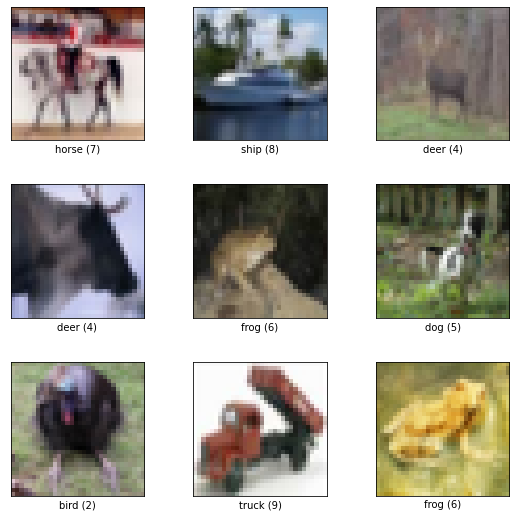

In [8]:
fig = tfds.show_examples(dataset_info, train_set)

Since Cifar10 has the same size for each image, so we don't need to resize the images. All we have to do is convert image type as numpy array and normalize every pixel.

# Preprocess Image

## Convert Image Type

In [0]:
X_train_ori = []
y_train_ori = []

X_test_ori = []
y_test_ori = []

for example in tfds.as_numpy(train_set):
    new_img = example['image']
    X_train_ori.append(new_img)
    y_train_ori.append(example['label'])
del train_set

for example in tfds.as_numpy(test_set):
    new_img = example['image']
    X_test_ori.append(new_img)
    y_test_ori.append(example['label'])
del test_set

# Convert train data to numpy array
X_train_ori = np.asarray(X_train_ori)
y_train_ori = np.asarray(y_train_ori)

# Convert test data to numpy array
X_test_ori = np.asarray(X_test_ori)
y_test_ori = np.asarray(y_test_ori)

# One hot label
y_train_hot = to_categorical(y_train_ori)
y_test_hot = to_categorical(y_test_ori)

## Normalize Data

In [0]:
mean_pixel = X_train_ori.mean(axis=(0, 1, 2), keepdims=True)
std_pixel = X_train_ori.std(axis=(0, 1, 2), keepdims=True)

X_train = ((X_train_ori - mean_pixel) / std_pixel).astype('float32')

X_test = ((X_test_ori - mean_pixel) / std_pixel).astype('float32')

# Split Train Data into Train and Val

In [11]:
# Set the length of Train data
dataset_size = len(X_train)
train_idx = int(0.8 * dataset_size)

# Split for val data
X_val = X_train[train_idx:, :]
y_val_hot = y_train_hot[train_idx:]

# Split for train data
X_train = X_train[:train_idx, :]
y_train_hot = y_train_hot[:train_idx]

print('X_train.shape =', X_train.shape)
print('X_val.shape =', X_val.shape)
print('X_test.shape =', X_test.shape)

print('y_train.shape =', y_train_hot.shape)
print('y_val.shape =', y_val_hot.shape)
print('y_test.shape =', y_test_hot.shape)

X_train.shape = (40000, 32, 32, 3)
X_val.shape = (10000, 32, 32, 3)
X_test.shape = (10000, 32, 32, 3)
y_train.shape = (40000, 10)
y_val.shape = (10000, 10)
y_test.shape = (10000, 10)


In [12]:
model1 = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.5),
    Dense(units=256, activation='relu'),    
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         2

In [13]:
history = []

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

his = model1.fit(X_train, y_train_hot, batch_size=64, epochs=20, validation_data=(X_val, y_val_hot))
history.append(his)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 9s 225us/sample - loss: 1.7618 - accuracy: 0.3173 - val_loss: 1.3183 - val_accuracy: 0.5057
Epoch 2/20
40000/40000 [==============================] - 7s 182us/sample - loss: 1.2379 - accuracy: 0.5595 - val_loss: 1.0290 - val_accuracy: 0.6398
Epoch 3/20
40000/40000 [==============================] - 7s 187us/sample - loss: 0.9900 - accuracy: 0.6579 - val_loss: 0.8740 - val_accuracy: 0.7008
Epoch 4/20
40000/40000 [==============================] - 7s 183us/sample - loss: 0.8428 - accuracy: 0.7108 - val_loss: 0.8318 - val_accuracy: 0.7176
Epoch 5/20
40000/40000 [==============================] - 7s 179us/sample - loss: 0.7463 - accuracy: 0.7495 - val_loss: 0.7976 - val_accuracy: 0.7252
Epoch 6/20
40000/40000 [==============================] - 7s 180us/sample - loss: 0.6767 - accuracy: 0.7720 - val_loss: 0.7389 - val_accuracy: 0.7439
Epoch 7/20
40000/40000 [==========================

We have used the Dropout in the network, but why it is still overfitting?

Yes, because the deeper the network is, it will learn more and it is possible to be overfitted because of the big capacity to learn. The deep network that we are building now needs more datasets so that our network will not only learn from the datasets we used. So, we must increase the number of datasets.

Let's do Data Augmentation.

In [0]:
data_gen_args = dict(
    rotation_range=0,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64

datagen = ImageDataGenerator(**data_gen_args)
datagen.fit(X_train)
augmented_train = datagen.flow(
    X_train, y_train_hot, batch_size
)

Luckily Tensorflow has an Image Data Generator API for data augmentation and if you want to know more you can check it here https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [15]:
model2 = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.5),
    Dense(units=256, activation='relu'),    
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 256)        

In [16]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

his = model2.fit_generator(augmented_train, validation_data = (X_val, y_val_hot), epochs=20)

history.append(his)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 625 steps, validate on 10000 samples
Epoch 1/20
625/625 [==============================] - 20s 32ms/step - loss: 1.7477 - accuracy: 0.3270 - val_loss: 1.3854 - val_accuracy: 0.4865
Epoch 2/20
625/625 [==============================] - 20s 32ms/step - loss: 1.2626 - accuracy: 0.5504 - val_loss: 1.0586 - val_accuracy: 0.6215
Epoch 3/20
625/625 [==============================] - 20s 32ms/step - loss: 1.0621 - accuracy: 0.6319 - val_loss: 0.8582 - val_accuracy: 0.6970
Epoch 4/20
625/625 [==============================] - 20s 32ms/step - loss: 0.9545 - accuracy: 0.6754 - val_loss: 0.8307 - val_accuracy: 0.7082
Epoch 5/20
625/625 [==============================] - 20s 31ms/step - loss: 0.8802 - accuracy: 0.7038 - val_loss: 0.7742 - val_accuracy: 0.7318
Epoch 6/20
625/625 [==============================] - 20s 32ms/step - loss: 0.8257 - accuracy: 0.7209 - val_loss: 0.7494 - val_accuracy: 0.7514
Epoch 7/20
625/625 [==============================] - 20s 32ms/step - loss: 0.7867 - accu

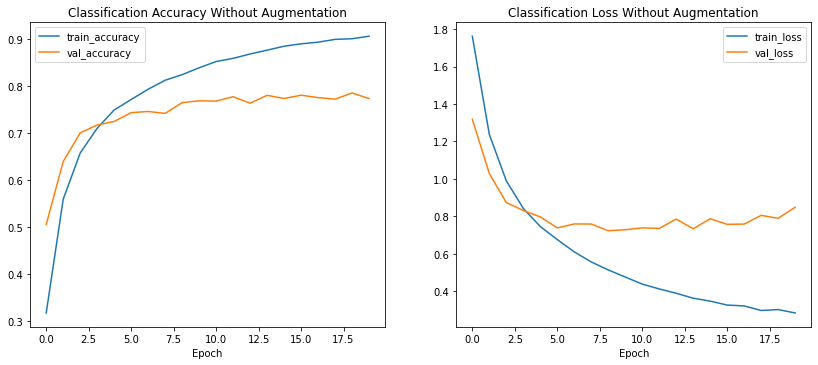

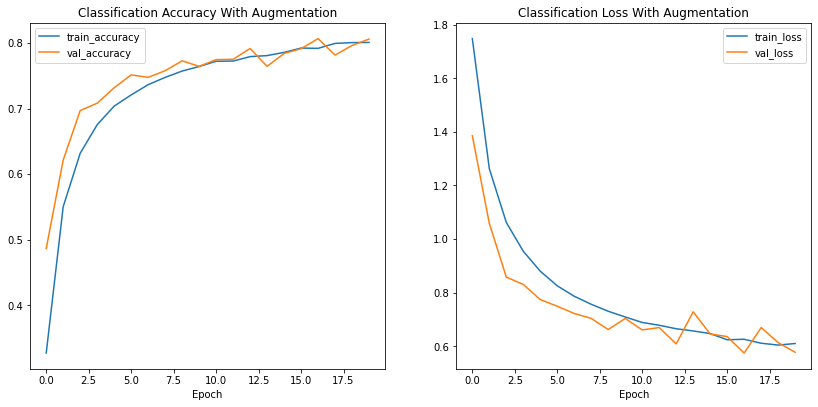

In [17]:
model_name = ["Without Augmentation", "With Augmentation"]

plt.rcParams['figure.figsize'] = [14, 14]
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, name in enumerate(model_name):
  plt.subplot(2, 2, i*2+1)
  plt.plot(history[i].history['accuracy'], label='train_accuracy')
  plt.plot(history[i].history['val_accuracy'], label='val_accuracy')
  plt.title("Classification Accuracy " + model_name[i])
  plt.xlabel('Epoch')
  plt.legend()

  plt.subplot(2, 2, i*2+2)
  plt.plot(history[i].history['loss'], label='train_loss')
  plt.plot(history[i].history['val_loss'], label='val_loss')
  plt.title("Classification Loss " + model_name[i])
  plt.xlabel('Epoch')
  plt.legend()
  
  plt.show()

# Evaluate Model

## Model Performance without Data Augmentation

In [19]:
train_scores = model1.evaluate(X_train, y_train_hot, batch_size=16, verbose=1)
test_scores  = model1.evaluate(X_test, y_test_hot, batch_size=16, verbose=1)
val_scores   = model1.evaluate(X_val, y_val_hot, batch_size=16, verbose=1)

print('Train Loss: %.5f with Accuracy: %.1f%%' % (train_scores[0], (train_scores[1]*100)))
print('Test  Loss: %.5f with Accuracy: %.1f%%' % (test_scores[0], (test_scores[1]*100)))
print('Val   Loss: %.5f with Accuracy: %.1f%%' % (val_scores[0], (val_scores[1]*100)))

10000/10000 [==============================] - 2s 191us/sample - loss: 0.8490 - accuracy: 0.7739
Train Loss: 0.19844 with Accuracy: 93.5%
Test  Loss: 0.91916 with Accuracy: 76.5%
Val   Loss: 0.84903 with Accuracy: 77.4%


## Model Performance with Data Augmentation

In [20]:
train_scores = model2.evaluate(X_train, y_train_hot, batch_size=16, verbose=1)
test_scores  = model2.evaluate(X_test, y_test_hot, batch_size=16, verbose=1)
val_scores   = model2.evaluate(X_val, y_val_hot, batch_size=16, verbose=1)

print('Train Loss: %.5f with Accuracy: %.1f%%' % (train_scores[0], (train_scores[1]*100)))
print('Test  Loss: %.5f with Accuracy: %.1f%%' % (test_scores[0], (test_scores[1]*100)))
print('Val   Loss: %.5f with Accuracy: %.1f%%' % (val_scores[0], (val_scores[1]*100)))

10000/10000 [==============================] - 2s 185us/sample - loss: 0.5778 - accuracy: 0.8061
Train Loss: 0.47514 with Accuracy: 83.9%
Test  Loss: 0.61824 with Accuracy: 79.5%
Val   Loss: 0.57783 with Accuracy: 80.6%


As we can see, the trained model without Data Augmentation is overfitting, and the model that are trained with augmented data can handle Overfitting. Do you want to know why Data Augmentation can handle Overfitting? See the explanation below.

# Data Augmentation

Sebagai contoh, katakanlah kita memiliki dataset yang berisi dua kelas yaitu Cat and Lion sebagai berikut

<p align=center>
<img src="https://raw.githubusercontent.com/Malikanhar/Deep-Learning-for-Image-Classification/master/Data%20Augmentation%20to%20Prevent%20Overfitting/Images/Image1.PNG" width='600'>
</p>

Based on the dataset, our model will learn to recognize object through the body poses. The model we trained will recognize that objects with sitting pose with the hands down and the head on the top is a cat and objects with only head that is covered more of the picture is a Lion, without recognizing the details of all parts of their body. Let's see what is the problem if we train the model like that.

## What's the problem?

Let say we test the model that we have trained using this picture.

<p align=center>
<img src="https://raw.githubusercontent.com/Malikanhar/Deep-Learning-for-Image-Classification/master/Data%20Augmentation%20to%20Prevent%20Overfitting/Images/Image2.PNG" width='250'>
</p>

Human can easily say that this picture is a cat. But the prediction of the model we have trained will see it as a Lion based on the datasets we used when we were training our model.

<p align=center>
<img src="https://raw.githubusercontent.com/Malikanhar/Deep-Learning-for-Image-Classification/master/Data%20Augmentation%20to%20Prevent%20Overfitting/Images/Image3.PNG" width='600'>
</p>
Because the model we have built to recognize objects by the pose, our model will predict that this picture is a lion.

## What should we do?

Absolutely, Data Augmentation. Let's see how does it works!

For instance, in this case we can do random cropping so that our model can learn the detail of the object.

<p align=center>
<img src="https://raw.githubusercontent.com/Malikanhar/Deep-Learning-for-Image-Classification/master/Data%20Augmentation%20to%20Prevent%20Overfitting/Images/Image4.PNG" width='600'><br>
<b>Random Croping</b>
</p>

With random cropping, our model will learn that cats have nose, ears, and eyes that are different with Lions. So, our model is not recognize those objects by their pose anymore, but it will learn from the detail of those objects.

<p align=center>
<img src="https://raw.githubusercontent.com/Malikanhar/Deep-Learning-for-Image-Classification/master/Data%20Augmentation%20to%20Prevent%20Overfitting/Images/Image5.PNG" width='600'>
</p>


Easy to understand, right?

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/malikanhar/>2019 - MALIK</a> </p>